### Loading and Inspecting the Dataset

In [58]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./data/profiles_dataset.csv')

data_info = data.info()
data_head = data.head()

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                1000 non-null   object 
 1   account_id               1000 non-null   object 
 2   nickname                 1000 non-null   object 
 3   biography                997 non-null    object 
 4   awg_engagement_rate      1000 non-null   float64
 5   comment_engagement_rate  1000 non-null   float64
 6   like_engagement_rate     1000 non-null   float64
 7   bio_link                 191 non-null    object 
 8   is_verified              1000 non-null   bool   
 9   followers                1000 non-null   int64  
 10  following                1000 non-null   int64  
 11  likes                    1000 non-null   int64  
 12  videos_count             1000 non-null   int64  
 13  create_time              0 non-null      float64
 14  id                       

(None,
     timestamp      account_id              nickname  \
 0  2023-08-01      a.r.m.y664                ❤️❤️❤️   
 1  2023-08-01           a2_9r       ايمن الفستقي🍺🥂🥃   
 2  2023-07-30     ti.po.check                   All   
 3  2023-08-06  nutrifersanort  L.N Fernanda Sánchez   
 4  2023-07-25          bhgdee                    D💲   
 
                                            biography  awg_engagement_rate  \
 0  nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...             0.049630   
 1                       حسابي الاصلي تيكتككك(_8_ytp_             0.059322   
 2  Активный пользователь ТикТока 🌝\nМеня зовут BD...             0.001399   
 3                 Nutrióloga, educadora en diabetes.             0.469767   
 4  Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...             0.122283   
 
    comment_engagement_rate  like_engagement_rate bio_link  is_verified  \
 0                 0.004473              0.045157      NaN        False   
 1                 0.004358        

### Preprocessing the Data
Select relevant features for the analysis, handle any missing values, and encode categorical variables if necessary, and getting the data ready for clustering.

In [59]:
features = data[['awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate', 
                 'is_verified', 'followers', 'following', 'likes', 'videos_count']]

# Encode the 'is_verified' boolean column as an integer
features['is_verified'] = features['is_verified'].astype(int)

# Check for missing values in the selected features
missing_values = features.isnull().sum()

missing_values

/var/folders/1x/jp3vqcs53vv9kxc9f40hgztc0000gn/T/ipykernel_14338/519979428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['is_verified'] = features['is_verified'].astype(int)


awg_engagement_rate        0
comment_engagement_rate    0
like_engagement_rate       0
is_verified                0
followers                  0
following                  0
likes                      0
videos_count               0
dtype: int64

### Feature Scaling
Since k-means clustering is sensitive to the scale of the data, standardize the features to have a mean of 0 and a standard deviation of 1.

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Optimal Number of Clusters
Use the Elbow Method to determine the most appropriate number of clusters for k-means clustering. This involves fitting the model with a range of cluster values and selecting the point where the inertia begins to decrease more slowly.

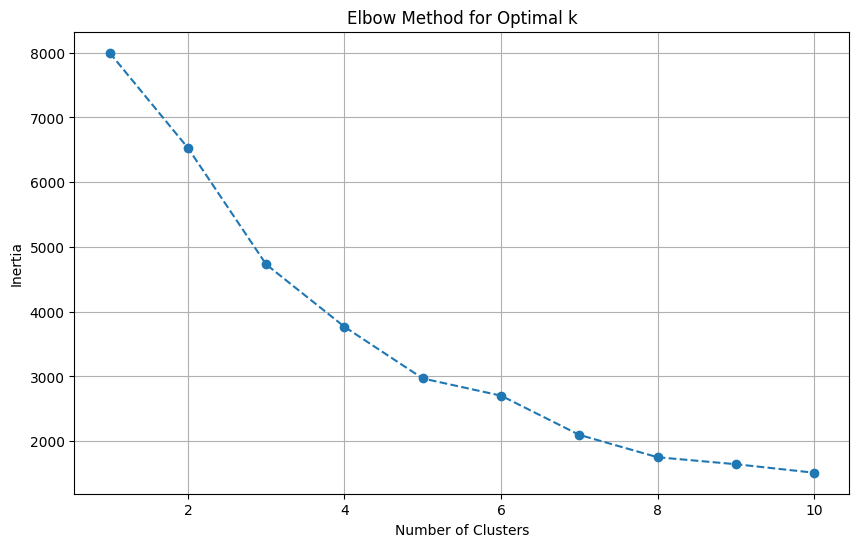

In [61]:
inertia = []
range_values = range(1, 11)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### K-Means Clustering
Perform k-means clustering using the optimal number of clusters determined in the previous step.

In [62]:
from sklearn.decomposition import PCA

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the dataset
data['Cluster'] = clusters

### Visualizing Clusters
Use PCA to reduce the dimensionality of the data for visualization purposes. Plot the clusters to visually assess how distinct they are from each other.

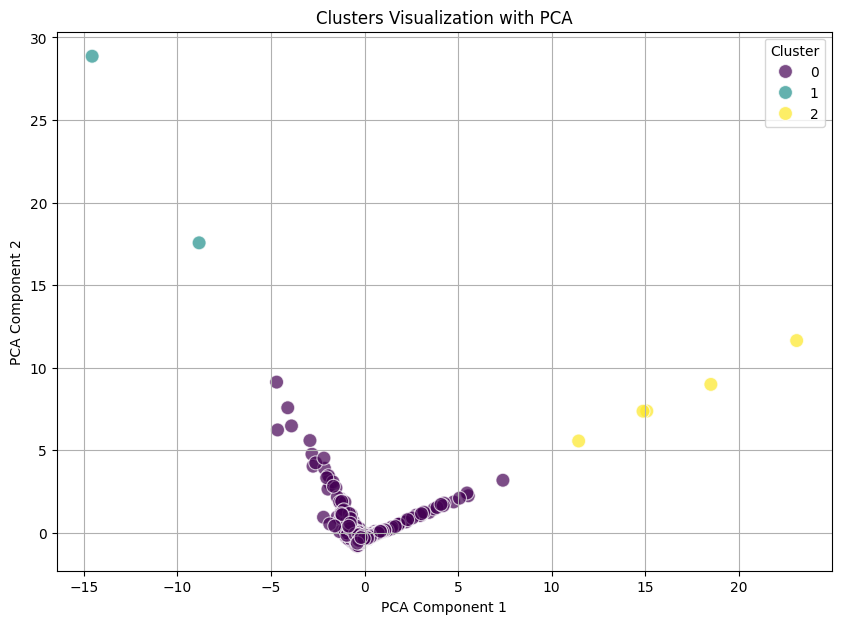

In [63]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=data['Cluster'], palette='viridis', alpha=0.7, s=100)
plt.title('Clusters Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

### Analyzing Cluster Centroids
Examine the centroids of the clusters to understand the defining characteristics of each cluster. This helps in interpreting the types of users within each cluster.

In [64]:
# Retrieve the centroids of the clusters in the original feature space
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame for easier interpretation of the centroids
centroids_df = pd.DataFrame(centroids, columns=features.columns)
centroids_df

,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,is_verified,followers,following,likes,videos_count
0,0.355785,0.022962,0.332822,0.018127,8.870586e+04,1144.698892,2.176184e+06,270.625378
1,0.009517,0.000056,0.009462,0.500000,1.250000e+07,29.500000,6.052500e+08,1590.000000
2,41.923845,0.753354,41.170491,0.000000,3.934000e+02,13.000000,6.695160e+04,6.200000


/Users/diegobolanos/Documents/GitHub/ContentPersonalizationForCreators/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


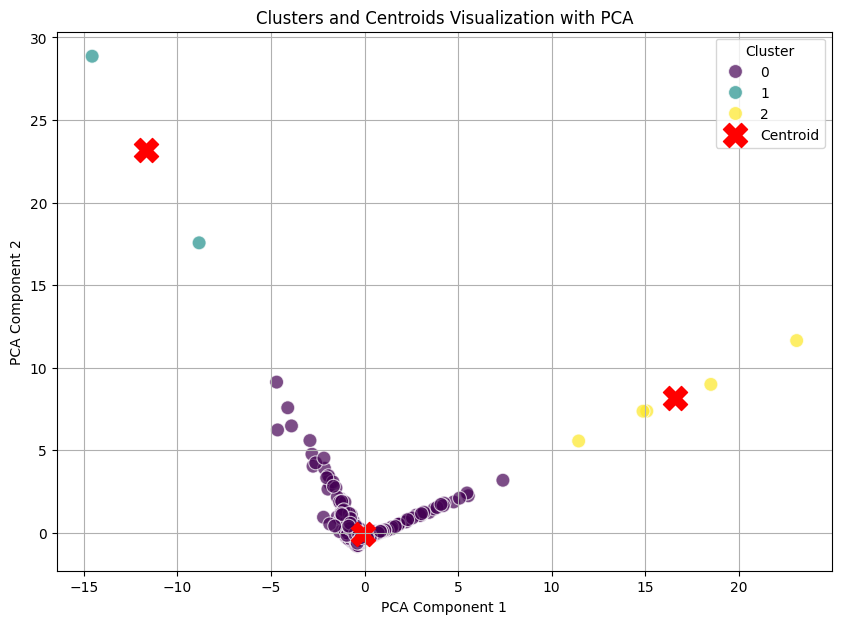

In [65]:
# Calculate the centroids in the PCA-reduced space for visualization
centroids_pca = pca.transform(scaler.transform(centroids))

# Plotting the clusters along with centroids
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=data['Cluster'], palette='viridis', alpha=0.7, s=100, legend='full')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroid')
plt.title('Clusters and Centroids Visualization with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### Interpreting the Clusters
Based on the analysis of cluster centroids and the distributions of key features across clusters, considering factors like engagement rates, follower counts, content production (videos uploaded), and verification status to distinguish between emerging influencers, niche content creators, and top-tier influencers or celebrities.

- Cluster 0: This group might represent emerging influencers or established influencers with a solid presence, indicated by moderate engagement rates, a significant number of followers, and substantial content production.
- Cluster 1: Characterized by exceptionally high engagement rates but lower follower counts, this cluster could include niche influencers or content creators who have highly engaged audiences despite a smaller scale.
- Cluster 2: With the highest follower counts, substantial content libraries, and a significant verification rate, this cluster likely represents top-tier influencers or celebrities, underscoring their high-profile status on the platform.